<a href="https://colab.research.google.com/github/neuraldl/DLAtypicalSerotoninergicCells/blob/main/Training_Biological_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Serotonergic Cell Recognition - DNN - Conv Model
Training & Analyzing


## Set Up Loading

In [ ]:
import os
import pandas as pd
from numpy import array
from numpy import hstack
import tensorflow as tf
from tensorflow import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from datetime import datetime, timedelta
import os
import IPython
import IPython.display
# Load the TensorBoard notebook extension
%load_ext tensorboard
# @title
from keras.optimizers import Adam
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow import keras
from keras import layers
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Data Modelling


Biological Data

SER Cellulars

https://drive.google.com/drive/folders/1OH8HZlfHk17qekf3vjGcXjaARikYGg2E?usp=sharing

NSER Cellulars

https://drive.google.com/drive/folders/1SzHVo5lmmJy1U2PvwYhHpvdnFpe9lCyP?usp=sharing

In [ ]:

# Paths to the data directories
directories = {
    "SERTIP": "../SER",
    "NSERTIP": "../NSER"
}

# Class labels
labels = {"SERTIP": 0, "NSERTIP": 1}
# Load the data (just for the first time, then jump at 2 cells below)
obs = []
lbs = []
cls = []
i = 0
for label, path in directories.items():
  folders = os.listdir(path)
  folders = sorted(folders)
  for folder in folders:
    if 'IMAGES' not in folder:
      path_folder = os.path.join(path,folder)
      print(path_folder)
      files = os.listdir(path_folder)
      print(len(files))
      i=0
      for file_name in files:
        file_path = os.path.join(path_folder, file_name)
        record = pd.read_csv(file_path,header=0)
        if len(record)==160:
          #print('OK')
          recordT = record.to_numpy().reshape(len(record),2,1)
          if len(obs)==0:
            obs = [recordT]
          else:
            obs = np.append(obs,[recordT], axis=0)
          cls = np.append(cls,[file_name])
          lbs = np.append(lbs,[labels[label]], axis=0)
          i+=1
lbs = lbs.reshape(len(lbs),1)
cls = cls.reshape(len(cls),1)
dimN = len(record)

/content/drive/MyDrive/NEURONDL/NEW-RAW-20231205 /3rd-RUN-Single-Spikes/SER/A131024#089
172
/content/drive/MyDrive/NEURONDL/NEW-RAW-20231205 /3rd-RUN-Single-Spikes/SER/A131024#092
380
/content/drive/MyDrive/NEURONDL/NEW-RAW-20231205 /3rd-RUN-Single-Spikes/SER/A131024#095
101
/content/drive/MyDrive/NEURONDL/NEW-RAW-20231205 /3rd-RUN-Single-Spikes/SER/A131024#098
288
/content/drive/MyDrive/NEURONDL/NEW-RAW-20231205 /3rd-RUN-Single-Spikes/SER/A131024#101
374
/content/drive/MyDrive/NEURONDL/NEW-RAW-20231205 /3rd-RUN-Single-Spikes/SER/A131024#104
185
/content/drive/MyDrive/NEURONDL/NEW-RAW-20231205 /3rd-RUN-Single-Spikes/SER/A131024#107
240
/content/drive/MyDrive/NEURONDL/NEW-RAW-20231205 /3rd-RUN-Single-Spikes/SER/A131024#110
252
/content/drive/MyDrive/NEURONDL/NEW-RAW-20231205 /3rd-RUN-Single-Spikes/SER/A131024#113
319
/content/drive/MyDrive/NEURONDL/NEW-RAW-20231205 /3rd-RUN-Single-Spikes/SER/A131024#116
131
/content/drive/MyDrive/NEURONDL/NEW-RAW-20231205 /3rd-RUN-Single-Spikes/SER/A131

In [ ]:
len(obs),len(lbs),len(cls)

(43327, 43327, 43327)

###Split the data using Scikit-learn:

In [ ]:
# @title
from sklearn.model_selection import train_test_split

# Features and labels
X = obs
y = lbs

# Splitting the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:

# Features and labels
X = obs
y = lbs
# Splitting the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
# Model / data parameters
num_classes = 2
print("x_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

x_train shape: (30328, 160, 2, 1)
30328 train samples
6500 test samples


In [ ]:
y_train.shape, y_val.shape, y_test.shape, X_val.shape, y_val.shape

((30328, 2), (6499, 2), (6500, 2), (6499, 160, 2, 1), (6499, 2))

## Model Compiling & Training

DNN Keras Models and Results

ModelsDNN Folder

https://drive.google.com/drive/folders/1zjwc-_P6zjsmc77BdwgBhxrEhBGw8Igz?usp=sharing

In [ ]:
for i in range(1,32,1):
  keras.backend.clear_session()
  input_shape = (dimN,2,1)
  modelConv = keras.Sequential(
      [
          keras.Input(shape=input_shape),
          layers.LayerNormalization(axis=[1]),
          layers.Conv2D(32, kernel_size=(i, 1), activation="relu"),
          layers.MaxPooling2D(pool_size=(2, 1)),
          layers.Conv2D(64, kernel_size=(i, 1), activation="relu"),
          layers.MaxPooling2D(pool_size=(2, 2)),
          layers.Flatten(),
          layers.Dropout(0.5),
          layers.Dense(num_classes, activation="sigmoid"),
      ]
  )
  modelConv.summary()
  batch_size = 64
  epochs = 25

  modelConv.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.FalsePositives(),tf.keras.metrics.FalseNegatives(),tf.keras.metrics.SensitivityAtSpecificity(0.5)])
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=10,
                                                    mode='min')
  log_dir = "../ModelsDNN/logs_article/serot/new-fit/ModConvBinNormN"+str(i)
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
  history = modelConv.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val), callbacks=[early_stopping,tensorboard_callback])#validation_split=0.1)
  score = modelConv.evaluate(X_test, y_test, verbose=0)
  print("Test loss:", score[0])
  print("Test accuracy:", score[1])
  modelConv.save("../ModelsDNN/ModConvBinNormN"+str(i)+".keras")
  hist_df = pd.DataFrame(history.history)
  pathH = "../ModelsDNN/ModConvBinNormN"+str(i)+"_history.csv"
  #print(pathH)
  hist_df.to_csv(pathH)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_normalization (Layer  (None, 160, 2, 1)         320       
 Normalization)                                                  
                                                                 
 conv2d (Conv2D)             (None, 160, 2, 32)        64        
                                                                 
 max_pooling2d (MaxPooling2  (None, 80, 2, 32)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 80, 2, 64)         2112      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 40, 1, 64)         0         
 g2D)                                                            
                                                        

## Model Scores Analyzing

In [ ]:
dfTotNormScores = pd.DataFrame(columns=['Model','Test loss','Test accuracy','Test Precision','Test Recall','Test Binary Accuracy','Test False Positives','Test False Negatives',' Test Sensitivity At Specificity 0.5'])
for i in range(1,32,1):
  keras.backend.clear_session()
  loaded_model = tf.keras.models.load_model("../ModelsDNN/ModConvBinNormN"+str(i)+".keras")
  score = loaded_model.evaluate(X_test, y_test, verbose=0)
  model_name = "ModConvBinNormN"+str(i)+".keras"
  print("ModConvBinNormN"+str(i)+".keras")
  loaded_model.summary()
  print("Test loss:", score[0])
  print("Test accuracy:", score[1])
  dfTotNormScores.loc[i] = [model_name, score[0], score[1], score[2], score[3], score[4], score[5], score[6],score[7]]

ModConvBinNormN1.keras
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_normalization (Layer  (None, 160, 2, 1)         320       
 Normalization)                                                  
                                                                 
 conv2d (Conv2D)             (None, 160, 2, 32)        64        
                                                                 
 max_pooling2d (MaxPooling2  (None, 80, 2, 32)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 80, 2, 64)         2112      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 40, 1, 64)         0         
 g2D)                                                            
                                 

In [ ]:
dfTotNormScores.to_csv('../ModelsDNN/ModConvBinNormN_Tot_Scores.csv')

In [ ]:
dfTotNormScores

,Model,Test loss,Test accuracy,Test Precision,Test Recall,Test Binary Accuracy,Test False Positives,Test False Negatives,Test Sensitivity At Specificity 0.5
1,ModConvBinNormN1.keras,0.222171,0.906462,0.906615,0.906615,0.906615,607.0,607.0,0.996154
2,ModConvBinNormN2.keras,0.158931,0.936154,0.936144,0.936000,0.936077,415.0,416.0,0.998923
3,ModConvBinNormN3.keras,0.113552,0.956000,0.955706,0.956000,0.955846,288.0,286.0,0.999846
4,ModConvBinNormN4.keras,0.089641,0.965846,0.966149,0.966000,0.966077,220.0,221.0,0.999385
5,ModConvBinNormN5.keras,0.084413,0.970923,0.970923,0.970923,0.970923,189.0,189.0,0.999385
6,ModConvBinNormN6.keras,0.075321,0.971385,0.971235,0.971385,0.971308,187.0,186.0,0.999385
7,ModConvBinNormN7.keras,0.062026,0.975538,0.975542,0.975692,0.975615,159.0,158.0,0.999846
8,ModConvBinNormN8.keras,0.062210,0.977846,0.977699,0.978000,0.977846,145.0,143.0,0.999231
9,ModConvBinNormN9.keras,0.052634,0.980308,0.980305,0.980154,0.980231,128.0,129.0,0.999846
10,ModConvBinNormN10.keras,0.048803,0.982615,0.982467,0.982769,0.982615,114.0,112.0,0.999692


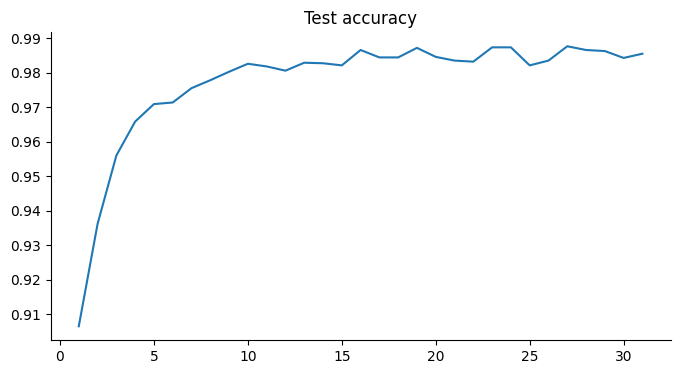

In [ ]:
from matplotlib import pyplot as plt
dfTotNormScores['Test accuracy'].plot(kind='line', figsize=(8, 4), title='Test accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)